# Testicular Germ Cell Tumors (TGCT)
[Jump to the urls to download the GCT and CLS files](#Downloads)

**Authors:** Alejandra Ramos, Marylu Villa and Edwin Juarez 
**Is this what you want your scientific identity to be?**  
**Contact info:** Email Edwin at [ejuarez@cloud.ucsd.edu](mailto:ejuarez@cloud.ucsd.edu) or post a question in http://www.genepattern.org/help

This notebook provides the steps to download all the TGCT samples from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

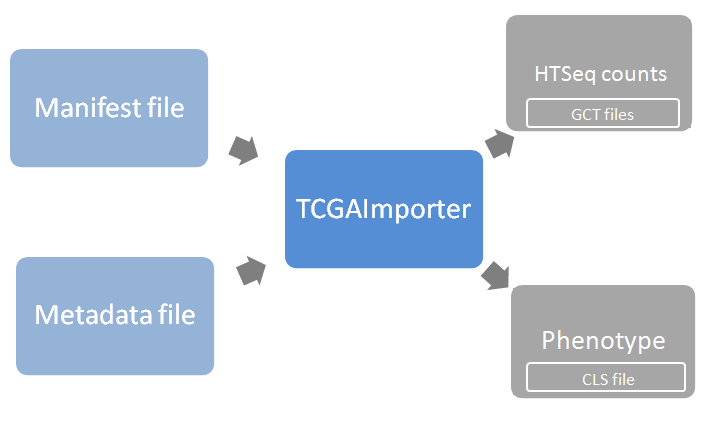

# Overview


TGCT is a rare disease that is difficult to manage, surgical resection is the primary treatment currently available. To date no disease registry exists and there is little data available detailing the management of patients with diffuse TGCT, the burden of diffuse TGCT for patients (including pain, joint stiffness, swelling, reduced mobility and quality of life) or the economic impact of diffuse TGCT.

<p><img alt="Resultado de imagen para Testicular Germ Cell Tumors" src="http://nethealthbook.com/wp-content/uploads/2014/11/bigstock-Testicular-Cancer-63378559.jpg" style="width: 667px; height: 500px;" /></p>


# TGCT Statistics

Between 1999 and 2012, TGCT incidence rates, both overall and by histology, were highest among NHWs, followed by Hispanics, Asian/Pacific Islanders, and non-Hispanic blacks. Between 2013 and 2026, rates among Hispanics were forecast to increase annually by 3.96% (95% confidence interval, 3.88%-4.03%), resulting in the highest rate of increase of any racial/ethnic group. By 2026, the highest TGCT rates in the US will be among Hispanics because of increases in both seminomas and nonseminomas. Rates among NHWs will slightly increase, whereas rates among other groups will slightly decrease.

More than 90% of testicular neoplasms originate from germ cells. Testicular germ cell tumors (GCTs) are a heterogeneous group of neoplasms with diverse histopathology and clinical behavior.




<p><img alt="Imagen relacionada" src="https://www.cancerresearchuk.org/sites/default/files/cstream-node/inc_anatomicalsite_testis_0.png" style="width: 478px; height: 500px;" /></p>
https://www.cancerresearchuk.org/health-professional/cancer-statistics/statistics-by-cancer-type/testicular-cancer/incidence


# Dataset's Demographic information


<p>TCGA &nbsp;contained 150 TGCT&nbsp;samples (150&nbsp;primary cancer samples, and 0 normal tissue samples)&nbsp;from 150&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-UVM%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link.(these data were gathered on July 10th, 2018)</a></p>


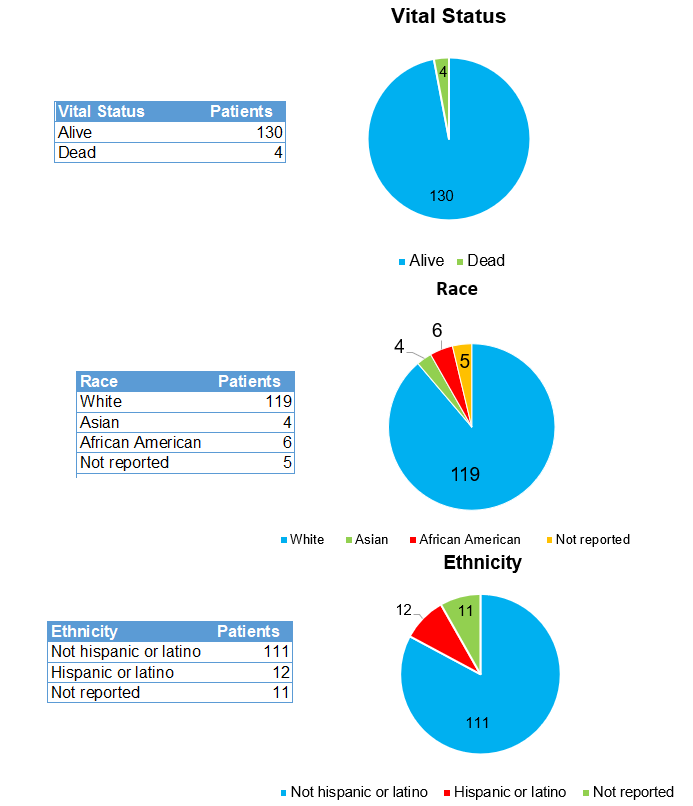

# Login to GenePattern


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [17]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://gp-beta-ami.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter


Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file</em>: a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file</em>: a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>TGCT_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>TGCT_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 2 minutes</p>


In [19]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run2714052530109264940.tmp/TGCT_manifest.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run2817674009956120503.tmp/TGCT_metadata.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "TGCT_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "False")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)

job35199 = gp.GPJob(genepattern.session.get(0), 35199)
genepattern.display(job35199)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

GPJobWidget(job_number=31842)

In [18]:
collapsedataset_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')
collapsedataset_job_spec = collapsedataset_task.make_job_spec()
collapsedataset_job_spec.set_parameter("dataset.file", "https://cloud.genepattern.org/gp/jobResults/31842/TCGA_dataset.gct")
collapsedataset_job_spec.set_parameter("chip.platform", "ftp://ftp.broadinstitute.org/pub/gsea/annotations/ENSEMBL_human_gene.chip")
collapsedataset_job_spec.set_parameter("collapse.mode", "Maximum")
collapsedataset_job_spec.set_parameter("output.file.name", "<dataset.file_basename>.collapsed")
genepattern.display(collapsedataset_task)


job32421 = gp.GPJob(genepattern.session.get(0), 32421)
genepattern.display(job32421)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')

GPJobWidget(job_number=32421)

# Downloads


<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/TGCT/TGCT_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/TGCT/TGCT_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/TGCT/TGCT_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/TGCT/TGCT_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS


[3] https://www.ncbi.nlm.nih.gov/pubmed/17683189</p>

[4] https://clinicaltrials.gov/ct2/show/NCT02948088</p>

[5] https://www.naaccr.org/future-testicular-germ-cell-tumor-incidence-united-states-forecast-2026/</p>

[6] https://www.google.com/search?q=Testicular+Germ+Cell+Tumors+statistics+graphic&amp;tbm=isch&amp;tbs=rimg:CTVE1ZAWbDXkIjgOcLH5zM-glUeTdH2v2ldCObtVUkYMakd2xJVWzFyT1QfRVQOSqvvgSn9vagGWrwayZhxvvN-X6yoSCQ5wsfnMz6CVEX35piL41ePpKhIJR5N0fa_1aV0IRtFqwYO_1GXMAqEgk5u1VSRgxqRxFzOEuwTDZX2yoSCXbElVbMXJPVEYJ1h0Lj6hdLKhIJB9FVA5Kq--ARReXhVLQ1IQEqEglKf29qAZavBhFkwbSrY-rI4SoSCbJmHG-835frEVBDmU07LcQ8&amp;tbo=u&amp;sa=X&amp;ved=2ahUKEwj9vvCd5ojcAhWorVQKHZNfC5AQ9C96BAgBEBs&amp;biw=1366&amp;bih=635&amp;dpr=1#imgrc=smYcb7zfl-uEPM:</p>
